# Gershgorinの定理

参考：
* [ゲルシュゴリンの定理](https://ja.m.wikipedia.org/wiki/ゲルシュゴリンの定理)

固有値がざっくりどのくらいの値に収まるかを評価したいときにはGershgorinの定理が便利です。

$A=(a_{j i})$を$(n\times n)$の複素正方行列とします。

---

**Gershgorinの定理**

任意の固有値$\lambda$は、複素平面上において、
$$D_i:= \{z|z \in \mathbb{C}, |z - a_{a_{ii}}|\leq r_i\}\;,$$
$$r_i := \sum_{j\neq i}|a_{ij}|$$

で定義される$n$個の円盤$D_i$の合併集合$\cup_{i=1}^nD_i$の中にある。

---

証明しましょう。
$x=[x_j]$を固有値$\lambda$に対応する固有ベクトルとします。このとき、
$$\sum_{j=1}^n a_{ij}x_j=\lambda x_i$$
です。
$|x_i|$が最大の$i$を$k$とおいて上の士気を変形すると、$(\lambda - a_{kk})x_k=\sum_{j\neq k}a_{kj}x_j$であるから、

$$|\lambda - a_{kk}|\cdot |x_k| \leq \sum_{j\neq k} |a_{kj}|\cdot |x_j|$$

なので、

$$|\lambda - a_{kk}| \leq \sum_{j\neq k} |a_{kj}|\cdot \frac{|x_j|}{|x_k|} \leq \sum_{j\neq k} |a_{kj}| = r_k$$

が成り立ちます。よって$\lambda \in D_k$です。


例を見てみましょう。


固有値 [-10.86910166   1.89948876   9.82178844   8.14782446]
中心 [ 10.   8.   2. -11.]
半径 [2.  0.6 1.2 2.2]


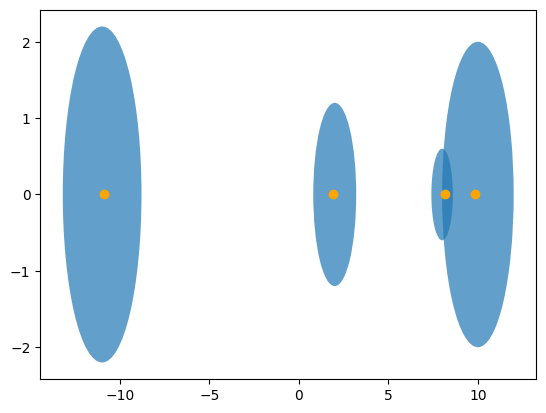

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches

A = np.array(
    [
        [10, -1, 0, 1],
        [0.2, 8, 0.2, 0.2],
        [1, 1, 2, 1],
        [-1, -1, -1, -11],
    ]
)

eig_values, _ = np.linalg.eig(A)
print("固有値", eig_values)

diag = np.diag(A)
print("中心", diag)
r_row = np.abs(A).sum(axis=1) - np.abs(diag)
r_col = np.abs(A).sum(axis=0) - np.abs(diag)
R = np.minimum(r_row, r_col)
print("半径", R)


fig, ax = plt.subplots()

# 円を描画します
for c, r in zip(diag, R):
    patch = patches.Circle(xy=(c, 0), radius=r, alpha=0.7)
    ax.add_patch(patch)

ax.autoscale()


# 固有値を描画します
for ev in eig_values:
    plt.scatter(ev, 0, color="orange")

plt.show()

ゲルシュゴリンの定理は条件数の大きな行列$A$に対する$Ax=b$の形の方程式を$x$について解くときに便利です。
条件数が大きいと$Ax=b$の回の誤差は大きくなってしまうので、何らかの前処理$PAx = Pb$を実現し、これを$x$について解きます。特に$P\approx A^{-1}$となるように選択すればよさそうですが、逆行列を求めるのは大変なので、
$PA \approx I$となることを利用します。
$PA$の固有値は全て１に近く、さらにゲルシュゴリンの定理からどの程度の範囲にあるかが分かるので、$P$の選び方を大まかに決定できます。
